<a href="https://colab.research.google.com/github/JohnnyAliyev/JohnnyAliyev-github.io/blob/main/18_Predicting_Salary_based_on_Years_of_experience_by_employing_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#284b68; overflow:hidden"><b> Predicting Salary based on Years of experience by employing Polynomial Regression </b></div>

# Problem statement
### WARNING: this project is low level very simle project for explaining Polynomial regression

- We have dataset consisting of 2 columns, namely Salary, Years of experience
- Aim is to  predict Salary  based on Years of experience
- Also use evaluation model for accuracy

#

# *1.Import Libraries*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#

# *2.Import dataset*

In [ ]:
data=pd.read_csv('Polynomial Regression/Employee_Salary.csv')
data.head()

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448


#

# *3.Data Analysis and Visualization*

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  2000 non-null   float64
 1   Salary               2000 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB


In [ ]:
data.describe()

,Years of Experience,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


In [ ]:
data.corr()

,Years of Experience,Salary
Years of Experience,1.000000,0.772432
Salary,0.772432,1.000000


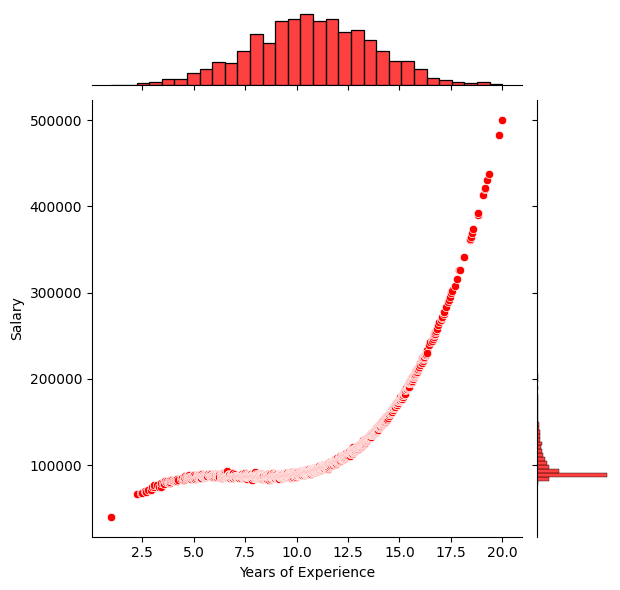

In [ ]:
# visualize
sns.jointplot(x=data['Years of Experience'],y=data['Salary'],color='red')

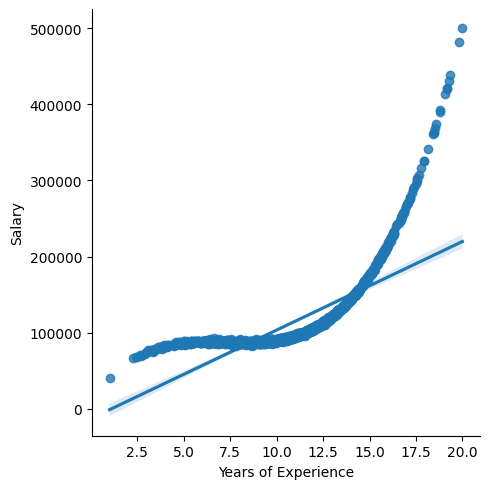

In [ ]:
sns.lmplot(x='Years of Experience',y='Salary', data=data)

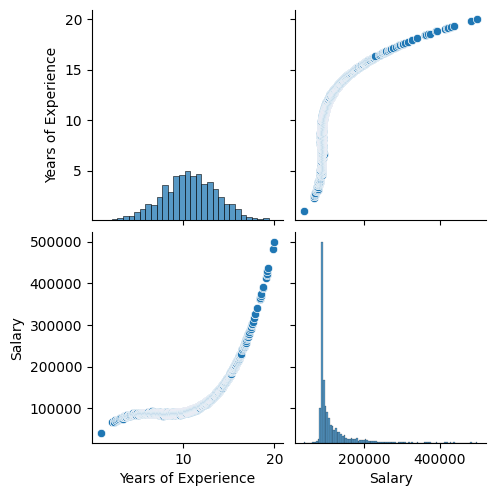

In [ ]:
sns.pairplot(data)

#

# *4.Split Dataset*

In [ ]:
from sklearn.model_selection  import train_test_split

X=data[['Years of Experience']]
Y=data['Salary']

X_train, X_test,Y_train, Y_test= train_test_split(X,Y, test_size=0.01 ,random_state=42)

print(X_train.shape, X_test.shape,Y_train.shape, Y_test.shape)

(1980, 1) (20, 1) (1980,) (20,)


#

# *5.Model Training*

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression(fit_intercept=True)
regressor.fit(X_train,Y_train)

LinearRegression()

In [ ]:
print('Intercept is :' , regressor.coef_)
print('Slope is :', regressor.intercept_ )

Intercept is : [11680.85214169]
Slope is : -13489.499144419868


Text(0.5, 0, 'Years of experience')

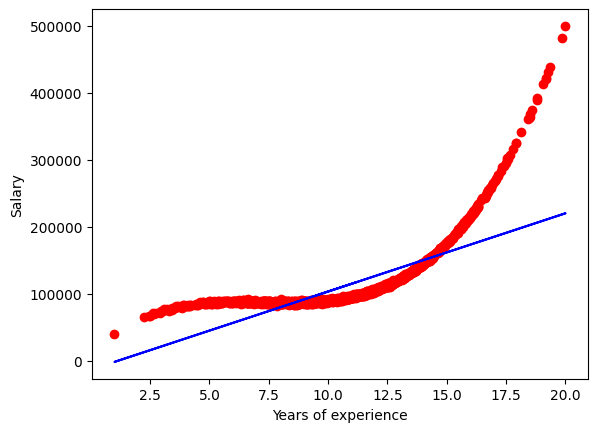

In [ ]:
#visualize result
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.ylabel('Salary')
plt.xlabel('Years of experience')


In [ ]:
# polynomial
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=5)
X_column=poly_reg.fit_transform(X_train)
pd.DataFrame(X_column).head()

,0,1,2,3,4,5
0,1.0,9.531774,90.854720,866.006673,8254.580075,7.868079e+04
1,1.0,13.612191,185.291736,2522.226446,34333.027402,4.673477e+05
2,1.0,17.684950,312.757464,5531.100187,97817.231465,1.729893e+06
3,1.0,11.028412,121.625873,1341.340240,14792.852877,1.631417e+05
4,1.0,15.862765,251.627302,3991.504669,63316.299124,1.004372e+06


In [ ]:
regressor=LinearRegression()
regressor.fit(X_column,Y_train)
print('Coefficient are :',regressor.coef_)

Coefficient are : [ 0.00000000e+00  3.28989920e+04 -4.68443813e+03  2.27275656e+02
 -1.20052460e+00  2.39827954e-02]


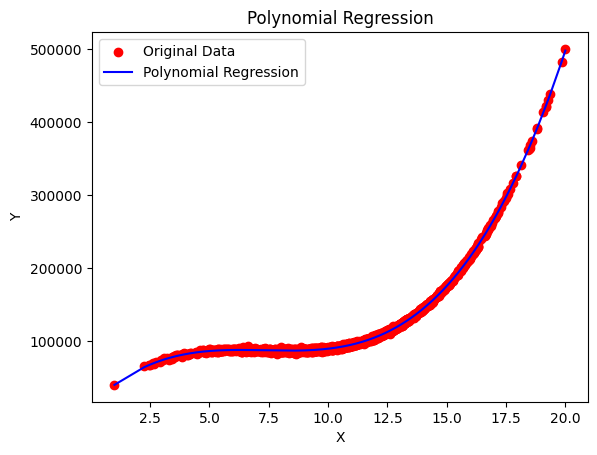

In [ ]:

# Polynomial transformation
poly_reg = PolynomialFeatures(degree=3)
X_column = poly_reg.fit_transform(X_train)
pd.DataFrame(X_column).head()

# Fitting the model
regressor = LinearRegression()
regressor.fit(X_column, Y_train)

# Prediction
y_p = regressor.predict(X_column)

# Visualization
plt.scatter(X_train, Y_train, color='red', label='Original Data')

# Converting to NumPy array and sorting
X_train_array = X_train.to_numpy().flatten() if isinstance(X_train, pd.DataFrame) else X_train.flatten()
sorted_indices = np.argsort(X_train_array)

plt.plot(X_train_array[sorted_indices], y_p[sorted_indices], color='blue', label='Polynomial Regression')

plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


#

# *6.Evaluation*

Degree 1 Metrics:
R-squared: 0.60
Mean Squared Error: 822192353.15
Root Mean Squared Error: 28673.90
Mean Absolute Error: 19420.73
Mean Absolute Percentage Error: 17.14%
Adjusted R-squared: 0.60

Degree 2 Metrics:
R-squared: 0.93
Mean Squared Error: 144353102.74
Root Mean Squared Error: 12014.70
Mean Absolute Error: 7911.00
Mean Absolute Percentage Error: 7.48%
Adjusted R-squared: 0.93

Degree 3 Metrics:
R-squared: 1.00
Mean Squared Error: 1625695.99
Root Mean Squared Error: 1275.03
Mean Absolute Error: 1024.61
Mean Absolute Percentage Error: 1.00%
Adjusted R-squared: 1.00

Degree 4 Metrics:
R-squared: 1.00
Mean Squared Error: 1625043.05
Root Mean Squared Error: 1274.77
Mean Absolute Error: 1024.39
Mean Absolute Percentage Error: 1.00%
Adjusted R-squared: 1.00



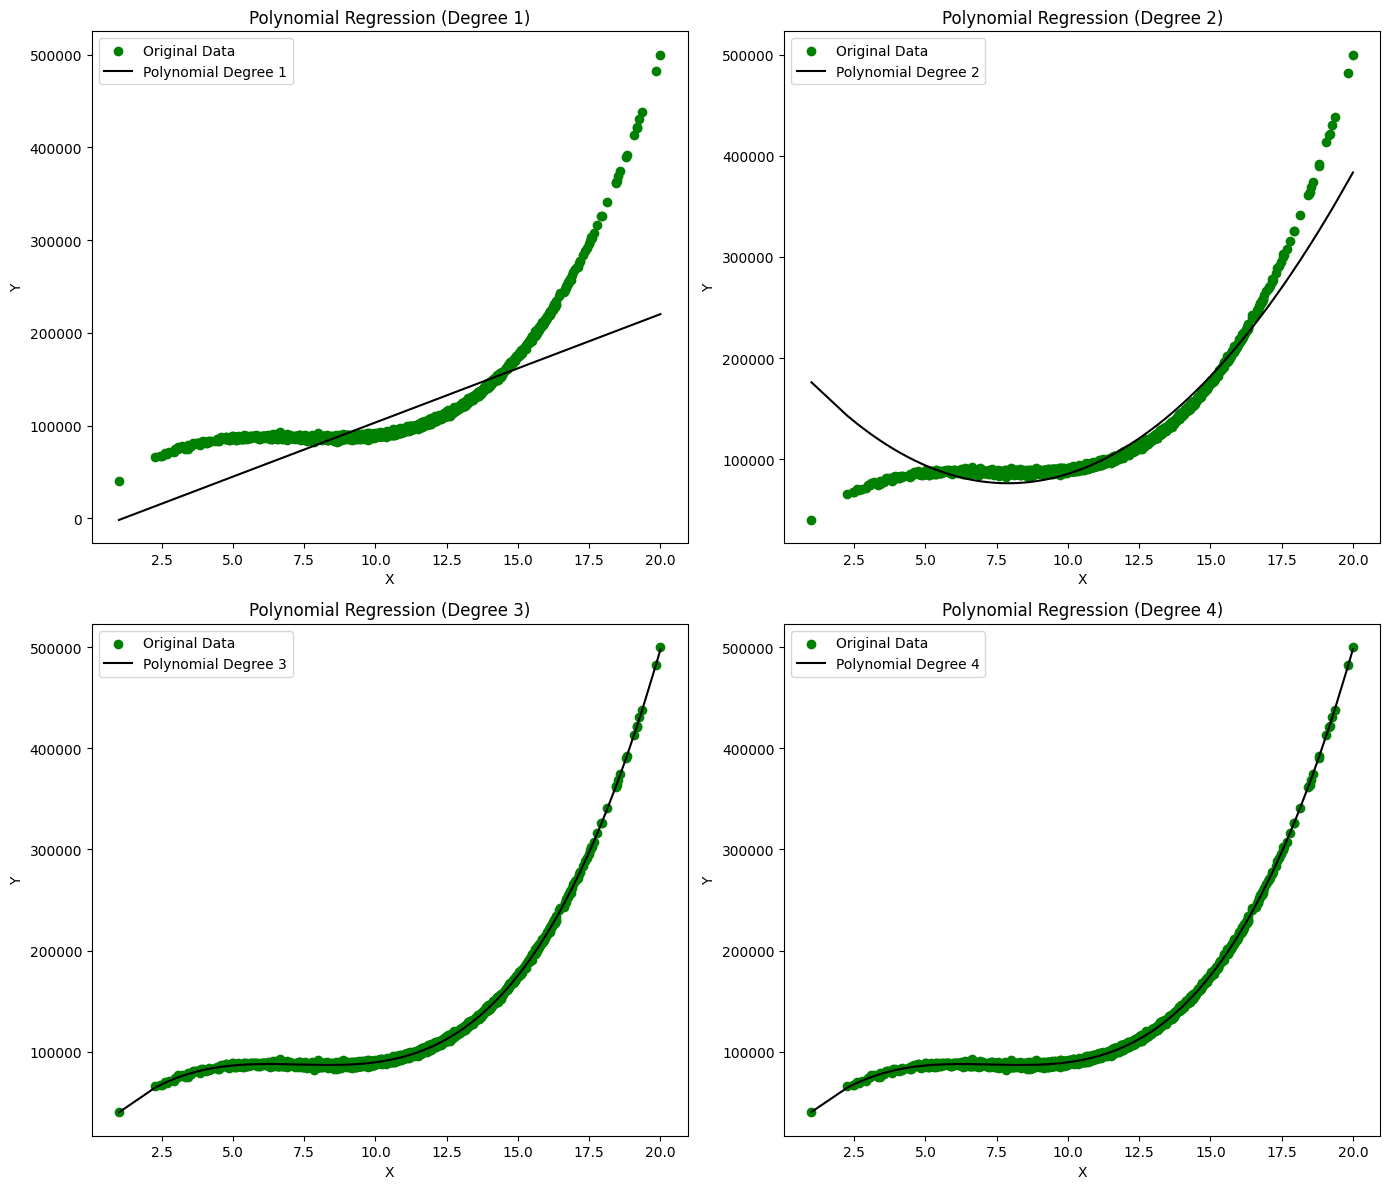

In [ ]:

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


fig, axs = plt.subplots(2, 2, figsize=(14, 12))
axs = axs.flatten()

for degree in range(1, 5):

    poly_reg = PolynomialFeatures(degree=degree)
    X_column = poly_reg.fit_transform(X_train)

    regressor = LinearRegression()
    regressor.fit(X_column, Y_train)

    y_pred = regressor.predict(X_column)

    r2 = r2_score(Y_train, y_pred)
    mse = mean_squared_error(Y_train, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_train, y_pred)
    mape = np.mean(np.abs((Y_train - y_pred) / Y_train)) * 100

    n = len(Y_train)
    p = X_column.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    print(f'Degree {degree} Metrics:')
    print(f'R-squared: {r2:.2f}')
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'Root Mean Squared Error: {rmse:.2f}')
    print(f'Mean Absolute Error: {mae:.2f}')
    print(f'Mean Absolute Percentage Error: {mape:.2f}%')
    print(f'Adjusted R-squared: {adjusted_r2:.2f}\n')

    axs[degree-1].scatter(X_train, Y_train, color='green', label='Original Data')
    axs[degree-1].plot(X_train.to_numpy().flatten()[np.argsort(X_train.to_numpy().flatten())],
                       y_pred[np.argsort(X_train.to_numpy().flatten())], color='black', label=f'Polynomial Degree {degree}')

    axs[degree-1].set_title(f'Polynomial Regression (Degree {degree})')
    axs[degree-1].set_xlabel('X')
    axs[degree-1].set_ylabel('Y')
    axs[degree-1].legend()

plt.tight_layout()
plt.show()
